In [4]:
import pandas as  pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
from statsmodels.tools import add_constant
import statsmodels.api as sm

1. Загрузить датасет
2. Предварительный анализ
3. Привести к нужному формату
4. Строить модель
5. Обучение модели
6. Проверка модели
7. Все плохо,возвращаемся в любой из пунктов выше
8. Если, вдруг,все хорошо - делаем выводы - получаем знания - хорошие эмоции - жизнь прекрасна

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning (ITHUB) /ДИ 2023/lessons/data/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


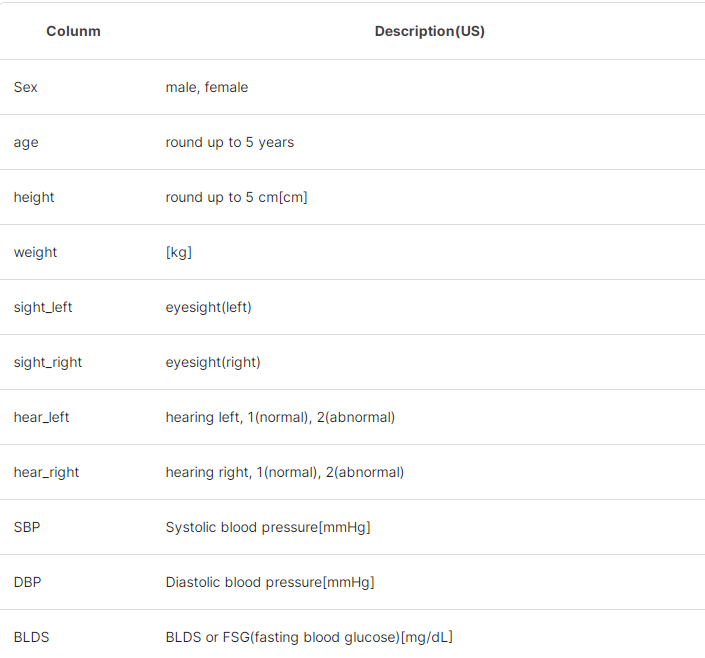

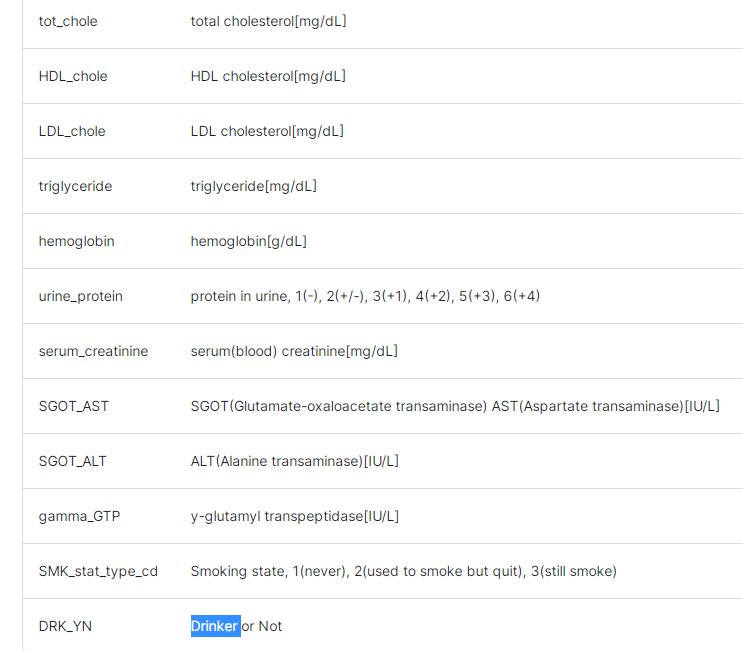

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [6]:
df['sex']=df['sex'].map({'Male':1,'Female':0})
df['DRK_YN']=df['DRK_YN'].map({'Y':1,'N':0})
df['hear_left']=df['hear_left']-1
df['hear_right']=df['hear_right']-1
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,0.0,0.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,0.0,0.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,0.0,0.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,0.0,0.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,0.0,0.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [ ]:
df['DRK_YN'].value_counts()

0    495858
1    495488
Name: DRK_YN, dtype: int64

In [7]:
#сделать срез
df_new = df[:50000]
df_new['DRK_YN'].value_counts()

0    25126
1    24874
Name: DRK_YN, dtype: int64

In [8]:
X=df_new.drop(['DRK_YN'],axis=1)
Y=df_new['DRK_YN']
X.shape

(50000, 23)

In [ ]:
X.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,1,35,170,75,90.0,1.0,1.0,0.0,0.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,1,30,180,80,89.0,0.9,1.2,0.0,0.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,1,40,165,75,91.0,1.2,1.5,0.0,0.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,1,50,175,80,91.0,1.5,1.2,0.0,0.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,1,50,165,60,80.0,1.0,1.2,0.0,0.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0


In [ ]:
df_new.corr()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
sex,1.000000,-0.079984,0.724737,0.581075,0.342132,0.099298,0.107890,0.009166,0.004146,0.176543,...,-0.013913,0.201939,0.672090,0.020203,0.361123,0.108681,0.196767,0.260621,0.594583,0.366416
age,-0.079984,1.000000,-0.395869,-0.197913,0.125500,-0.166806,-0.156079,0.205601,0.196312,0.262496,...,0.022617,0.037499,-0.168682,0.040404,0.036827,0.076472,-0.020666,0.023126,-0.120935,-0.277029
height,0.724737,-0.395869,1.000000,0.667354,0.261628,0.134859,0.140719,-0.077143,-0.077939,0.035930,...,-0.018366,0.128908,0.537087,-0.002659,0.251515,0.039328,0.141225,0.159153,0.470558,0.367703
weight,0.581075,-0.197913,0.667354,1.000000,0.631308,0.085084,0.092427,-0.041344,-0.042743,0.252561,...,0.053476,0.267228,0.502194,0.024191,0.223730,0.113435,0.279643,0.221464,0.369792,0.258637
waistline,0.342132,0.125500,0.261628,0.631308,1.000000,-0.002601,0.010890,0.038803,0.034397,0.270270,...,0.049226,0.230128,0.289620,0.040988,0.144063,0.113181,0.214989,0.186859,0.207851,0.089057
sight_left,0.099298,-0.166806,0.134859,0.085084,-0.002601,1.000000,0.316430,-0.042885,-0.043663,-0.036250,...,-0.001651,0.011009,0.081552,-0.005734,0.022676,-0.004800,0.022254,0.021341,0.063777,0.071931
sight_right,0.107890,-0.156079,0.140719,0.092427,0.010890,0.316430,1.000000,-0.035250,-0.025867,-0.027343,...,-0.007959,0.009969,0.084833,-0.009093,0.030384,-0.002044,0.024873,0.025882,0.077658,0.074269
hear_left,0.009166,0.205601,-0.077143,-0.041344,0.038803,-0.042885,-0.035250,1.000000,0.530557,0.055271,...,-0.010277,0.004339,-0.035545,0.021954,0.022007,0.014000,-0.005291,-0.004146,-0.012089,-0.057982
hear_right,0.004146,0.196312,-0.077939,-0.042743,0.034397,-0.043663,-0.025867,0.530557,1.000000,0.059507,...,-0.005996,0.004945,-0.032316,0.024889,0.016827,0.011227,-0.008693,-0.003589,-0.020242,-0.055679
SBP,0.176543,0.262496,0.035930,0.252561,0.270270,-0.036250,-0.027343,0.055271,0.059507,1.000000,...,0.027460,0.177832,0.164413,0.063372,0.100421,0.093189,0.116268,0.160991,0.086790,0.028828


In [ ]:
stats.pearsonr(df_new['gamma_GTP'], df_new['hemoglobin'])

PearsonRResult(statistic=0.22856260314919224, pvalue=0.0)

In [ ]:
tab= pd.crosstab(df_new['DRK_YN'], df_new['sex'])
tab

sex,0,1
DRK_YN,,
0,16340,8786
1,7080,17794


In [ ]:
stats.chi2_contingency(tab)

Chi2ContingencyResult(statistic=6711.554018679615, pvalue=0.0, dof=1, expected_freq=array([[11769.0184, 13356.9816],
       [11650.9816, 13223.0184]]))

In [ ]:
dfnew_1 = df_new[df_new['DRK_YN'] == 1]
dfnew_2 = df_new[df_new['DRK_YN'] == 0]
stats.ttest_ind(a= dfnew_1['weight'], b= dfnew_2['weight'], equal_var=False)

TtestResult(statistic=59.84799378524159, pvalue=0.0, df=49685.22109816648)

In [ ]:
print(dfnew_1['weight'].mean(), dfnew_2['weight'].mean())

66.50538715124226 60.030844543500756


In [17]:
log_reg = sm.Logit(Y, X[['waistline','weight','sex']]).fit()
print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.613285
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: DRK_YN           Pseudo R-squared: 0.115     
Date:               2023-10-02 04:52 AIC:              61334.5138
No. Observations:   50000            BIC:              61360.9731
Df Model:           2                Log-Likelihood:   -30664.   
Df Residuals:       49997            LL-Null:          -34657.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     5.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
waistline    -0.0430    0.0011  -40.4539  0.0000  -0.0451  -0.0409
weight        0.0438    0.0014   30.7856  0.0000   0.0410   0.

In [ ]:
scaler = StandardScaler()
stand_scal_X = scaler.fit_transform(X)
stand_scal_X = pd.DataFrame(stand_scal_X,columns=X.columns)
stand_scal_X

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,0.938677,-0.888340,0.833710,0.938617,0.734039,0.027504,0.032151,-0.178027,-0.174164,-0.167206,...,-0.232533,0.312114,-0.365804,1.816874,-0.220456,0.428951,-0.245838,0.359183,0.066505,-0.747450
1,0.938677,-1.241366,1.908938,1.338090,0.650416,-0.133471,0.357076,-0.178027,-0.174164,0.521910,...,-0.053380,0.848560,-0.101898,0.994697,-0.220456,0.122820,-0.295703,0.397884,-0.200716,1.691292
2,0.938677,-0.535314,0.296096,0.938617,0.817662,0.349455,0.844463,-0.178027,-0.174164,-0.167206,...,-0.411687,-0.955849,-0.256601,0.994697,-0.220456,0.122820,1.050652,0.243079,0.642058,-0.747450
3,0.938677,0.170737,1.371324,1.338090,0.817662,0.832381,0.357076,-0.178027,-0.174164,1.555582,...,0.484082,-0.224332,-0.238401,2.133096,-0.220456,0.735083,0.153082,0.320481,-0.385715,-0.747450
4,0.938677,0.170737,0.296096,-0.259801,-0.102188,0.027504,0.357076,-0.178027,-0.174164,1.073202,...,0.100181,0.092659,-0.256601,-0.270192,-0.220456,-0.183312,-0.345568,-0.530947,-0.241827,-0.747450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-1.065330,2.641918,-2.391973,-1.058746,0.416273,-1.260298,-1.267548,-0.178027,-0.174164,0.315175,...,-0.667621,0.726641,0.325811,-2.736724,4.331608,2.878004,0.202947,-0.143934,-0.344604,-0.747450
49996,0.938677,-1.594391,1.371324,0.139672,-0.603923,0.349455,0.357076,-0.178027,-0.174164,-0.373940,...,0.356115,0.726641,-0.657010,1.057941,-0.220456,0.735083,-0.395433,-0.376142,-0.344604,1.691292
49997,0.938677,0.876789,0.296096,0.139672,0.483171,-0.294446,-0.292773,-0.178027,5.741724,-0.580675,...,-0.283720,0.141427,0.216608,0.551986,-0.220456,0.122820,0.053352,-0.027830,-0.303493,0.471921
49998,0.938677,0.876789,0.833710,1.338090,1.319398,-0.133471,-0.292773,-0.178027,-0.174164,0.452998,...,-0.283720,0.604721,-0.247501,0.299008,-0.220456,0.735083,-0.495163,-0.453544,-0.385715,-0.747450


In [ ]:
#логистическая регрессия
#1
X_train, X_test, y_train, y_test = train_test_split(stand_scal_X, Y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=Y)

In [ ]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
coefs=pd.DataFrame()
coefs['coef']=clf.coef_[0]
coefs['column']=X.columns
print('Свободный член:',clf.intercept_)
coefs

Свободный член: [0.01943033]


,coef,column
0,0.516638,sex
1,-0.549403,age
2,0.116084,height
3,0.082158,weight
4,-0.012423,waistline
5,-0.003668,sight_left
6,-0.001500,sight_right
7,-0.020341,hear_left
8,-0.010245,hear_right
9,-0.042758,SBP


In [ ]:
y_pred = clf.predict(X_test)

for i in range(10):
  print(f'Модель - {y_pred[i]},Истинная метка - {y_test.values[i]}')

Модель - 0,Истинная метка - 0
Модель - 1,Истинная метка - 1
Модель - 0,Истинная метка - 1
Модель - 1,Истинная метка - 1
Модель - 1,Истинная метка - 1
Модель - 0,Истинная метка - 1
Модель - 0,Истинная метка - 1
Модель - 1,Истинная метка - 1
Модель - 1,Истинная метка - 0
Модель - 1,Истинная метка - 1


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7279


In [ ]:
#2 кросс-валидация
from sklearn.model_selection import cross_validate
scores = cross_validate(clf, X, Y, cv=10,scoring=('accuracy'))
scores['test_score'].mean().round(2)

0.72

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
C_values = [0.01,0.1]
solver = ['lbfgs', ]
penalty = ['l1', 'l2']
grid = dict(C=C_values,solver=solver,penalty=penalty)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model =  clf = LogisticRegression(max_iter=100)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(stand_scal_X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.720160 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.720160 (0.004956) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.720140 (0.005159) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
